## Starter file for assignment on Classification
### Author: Tri Lam 
### UH ID: 1916079


In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC



### Function for precision, recall, macrof1, microf1, and f1 scores
The indices of the classes in `y_pred` and `y` start from 0 in `pre_rec_f1`, e.g., [1, 1, 0, 0, 2, 2, 2].

In [16]:
def pre_rec_f1(y_pred, y):
    eps = np.finfo(float).eps
    num_cls = len(np.unique(y))
    tp_sum, fp_sum, fn_sum, f1_sum = 0, 0, 0, 0
    tps, fps, fns, pre, rec, f1s = [], [], [], [], [], []
    for i in range(num_cls):
        y_pred_i = y_pred == i
        y_i = y == i
        tp = np.logical_and(y_pred_i, y_i).sum()
        fp = np.logical_and(y_pred_i, (~y_i)).sum()
        fn = np.logical_and((~y_pred_i), y_i).sum()
        tp_sum += tp
        fp_sum += fp
        fn_sum += fn
        f1 = (2 * tp) / (2 * tp + fp + fn + eps)
        f1_sum += f1
        pre.append(tp / (tp + fp + eps))
        rec.append(tp / (tp + fn + eps))
        tps.append(tp)
        fps.append(fp)
        fns.append(fn)
        f1s.append(f1)

    macrof1 = f1_sum / (num_cls + eps)
    microf1 = (2 * tp_sum) / (2 * tp_sum + fp_sum + fn_sum + eps)
    return macrof1, microf1, tps, fps, fns, pre, rec, f1s


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Task 1 

In [18]:
#Task 1 A

dry_bean_data = pd.read_csv('Dry_Bean_Dataset.csv')

X = dry_bean_data.drop(columns=["Class", "Class_String", "Unnamed: 0"])  
y = dry_bean_data["Class"]

trained_models = {}

max_depths = [3, 7, 11, 15]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    model.fit(X, y)
    
    trained_models[depth] = model

print("Trained models for max depths:", list(trained_models.keys()))



Trained models for max depths: [3, 7, 11, 15]


In [19]:
#Task 1 C 

# Dictionary to hold results for each depth
results_dt = {"Max Depth": [], "Accuracy": [], "Precision": [], "Recall": [], "Macro-F1": [], "Micro-F1": []}
max_depths = [3, 7, 11, 15]

# Define scoring
scoring = {
    "accuracy": "accuracy",
    "precision_macro": make_scorer(precision_score, average="macro", zero_division=0),
    "recall_macro": make_scorer(recall_score, average="macro", zero_division=0),
    "f1_macro": "f1_macro",
    "f1_micro": "f1_micro"
}

# Perform 5-fold cross-validation for each depth
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_validate(model, X_scaled, y, cv=5, scoring=scoring)
    
    # Store average metrics
    results_dt["Max Depth"].append(depth)
    results_dt["Accuracy"].append(scores["test_accuracy"].mean())
    results_dt["Precision"].append(scores["test_precision_macro"].mean())
    results_dt["Recall"].append(scores["test_recall_macro"].mean())
    results_dt["Macro-F1"].append(scores["test_f1_macro"].mean())
    results_dt["Micro-F1"].append(scores["test_f1_micro"].mean())

# Convert to DataFrame
results_dt_df = pd.DataFrame(results_dt)
print("Decision Tree Cross-Validation Results:")
print(results_dt_df)

Decision Tree Cross-Validation Results:
   Max Depth  Accuracy  Precision    Recall  Macro-F1  Micro-F1
0          3  0.594453   0.484769  0.506731  0.448661  0.594453
1          7  0.573447   0.626036  0.647667  0.596197  0.573447
2         11  0.545011   0.593450  0.617991  0.561036  0.545011
3         15  0.541411   0.607068  0.615651  0.554737  0.541411


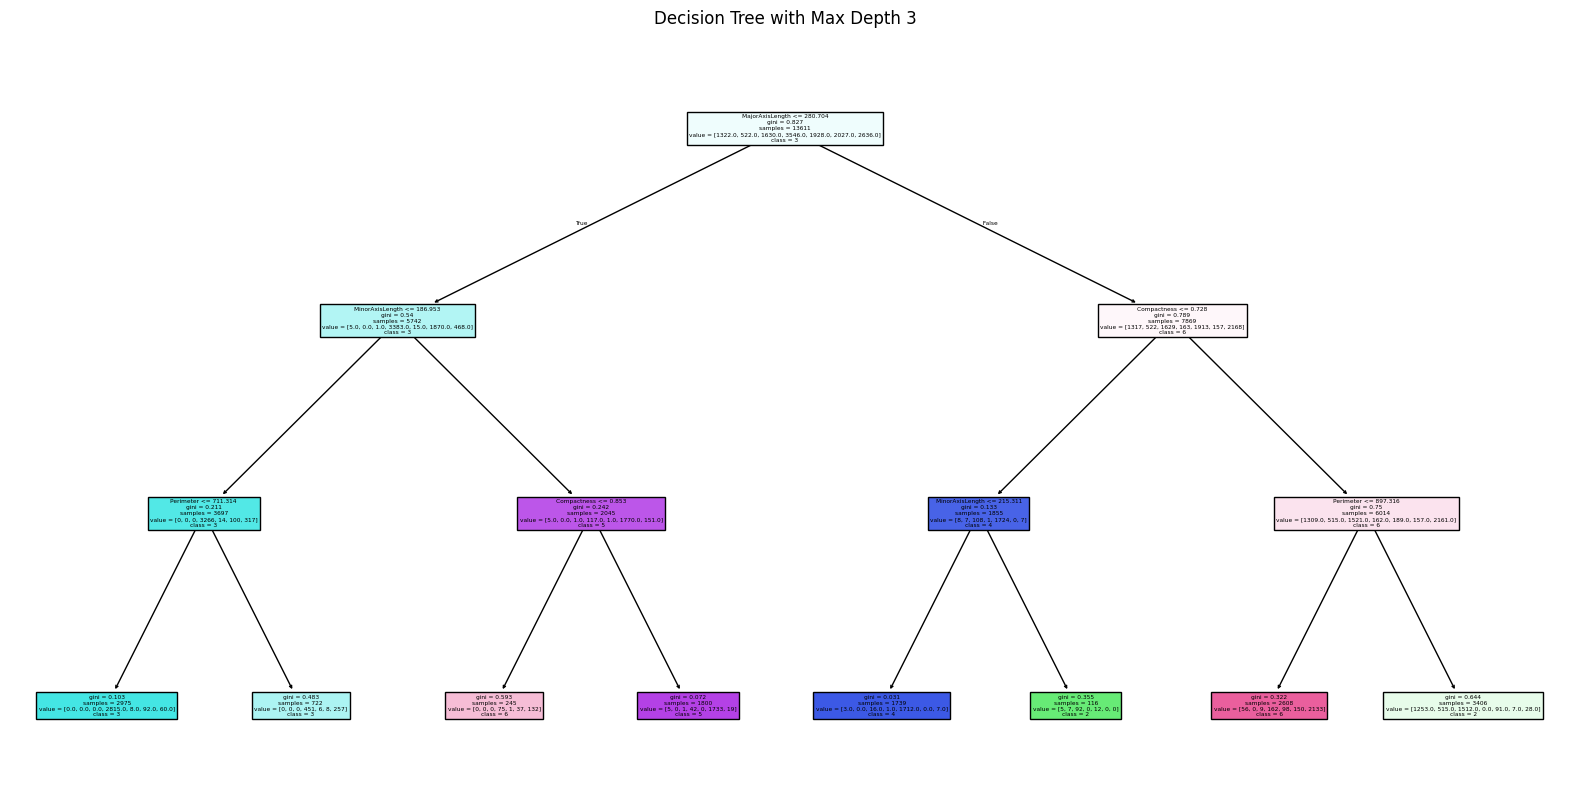

In [20]:
#Task 1 F

from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

dry_bean_data = pd.read_csv('Dry_Bean_Dataset.csv')

X = dry_bean_data.drop(columns=["Class", "Class_String", "Unnamed: 0"])  # Remove unnecessary columns
y = dry_bean_data["Class"]

model_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_depth_3.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(model_depth_3, filled=True, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())])
plt.title("Decision Tree with Max Depth 3")
plt.show()


### Task 2

In [21]:
# Task 2 A

dry_bean_data = pd.read_csv('Dry_Bean_Dataset.csv')

X = dry_bean_data.drop(columns=["Class", "Class_String", "Unnamed: 0"])
y = dry_bean_data["Class"]

trained_knn_models = {}
neighbor_counts = [3, 9, 17, 25]

for n_neighbors in neighbor_counts:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X, y)
    trained_knn_models[n_neighbors] = knn_model

print("Trained K-NN models for neighbor counts:", list(trained_knn_models.keys()))


Trained K-NN models for neighbor counts: [3, 9, 17, 25]


### Task 3


In [23]:
#Task 3 A
dry_bean_data = pd.read_csv('Dry_Bean_Dataset.csv') 

X = dry_bean_data.drop(columns=["Class", "Class_String", "Unnamed: 0"])
y = dry_bean_data["Class"]

trained_svm_models = {}
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X, y)
    trained_svm_models[kernel] = svm_model

print("Trained SVM models for kernels:", list(trained_svm_models.keys()))


Trained SVM models for kernels: ['linear', 'poly', 'rbf', 'sigmoid']


### Task 5

In [37]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
dry_bean_data = pd.read_csv('Dry_Bean_Dataset.csv')  # Use the uploaded file
X = dry_bean_data.drop(columns=["Class", "Class_String", "Unnamed: 0"])  # Features
y = dry_bean_data["Class"]  # Target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.width', None)  # To avoid wrapping
pd.set_option('display.max_colwidth', None)

# Define scoring metrics dynamically
scoring = {
    "accuracy": "accuracy",
    "precision_macro": make_scorer(precision_score, average="macro", zero_division=0),
    "recall_macro": make_scorer(recall_score, average="macro", zero_division=0),
    "f1_macro": "f1_macro",
    "f1_micro": "f1_micro"
}

# Task 1: Decision Tree Cross-Validation (Task 1C)
def decision_tree_cv(X_scaled, y):
    results_dt = {"Max Depth": [], "Accuracy": [], "Precision": [], "Recall": [], "Macro-F1": [], "Micro-F1": []}
    max_depths = [3, 7, 11, 15]
    
    for depth in max_depths:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        scores = cross_validate(model, X_scaled, y, cv=5, scoring=scoring)
        results_dt["Max Depth"].append(depth)
        results_dt["Accuracy"].append(scores["test_accuracy"].mean())
        results_dt["Precision"].append(scores["test_precision_macro"].mean())
        results_dt["Recall"].append(scores["test_recall_macro"].mean())
        results_dt["Macro-F1"].append(scores["test_f1_macro"].mean())
        results_dt["Micro-F1"].append(scores["test_f1_micro"].mean())

    return pd.DataFrame(results_dt)

results_dt_df = decision_tree_cv(X_scaled, y)
print("Task 1: Decision Tree Cross-Validation Results")
print(results_dt_df)

# Task 2: K-NN Cross-Validation (Task 2C)
def knn_cv(X_scaled, y):
    results_knn = {"Neighbors": [], "Accuracy": [], "Precision": [], "Recall": [], "Macro-F1": [], "Micro-F1": []}
    neighbor_counts = [3, 9, 17, 25]
    
    for n_neighbors in neighbor_counts:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_validate(knn_model, X_scaled, y, cv=5, scoring=scoring)
        results_knn["Neighbors"].append(n_neighbors)
        results_knn["Accuracy"].append(scores["test_accuracy"].mean())
        results_knn["Precision"].append(scores["test_precision_macro"].mean())
        results_knn["Recall"].append(scores["test_recall_macro"].mean())
        results_knn["Macro-F1"].append(scores["test_f1_macro"].mean())
        results_knn["Micro-F1"].append(scores["test_f1_micro"].mean())

    return pd.DataFrame(results_knn)

results_knn_df = knn_cv(X_scaled, y)
print("\nTask 2: K-NN Cross-Validation Results")
print(results_knn_df)

# Task 3: SVM Cross-Validation (Task 3C)
def svm_cv(X_scaled, y):
    results_svm = {"Kernel": [], "Accuracy": [], "Precision": [], "Recall": [], "Macro-F1": [], "Micro-F1": []}
    kernels = ["linear", "poly", "rbf", "sigmoid"]
    
    for kernel in kernels:
        svm_model = SVC(kernel=kernel, random_state=42)
        scores = cross_validate(svm_model, X_scaled, y, cv=5, scoring=scoring)
        results_svm["Kernel"].append(kernel)
        results_svm["Accuracy"].append(scores["test_accuracy"].mean())
        results_svm["Precision"].append(scores["test_precision_macro"].mean())
        results_svm["Recall"].append(scores["test_recall_macro"].mean())
        results_svm["Macro-F1"].append(scores["test_f1_macro"].mean())
        results_svm["Micro-F1"].append(scores["test_f1_micro"].mean())

    return pd.DataFrame(results_svm)

results_svm_df = svm_cv(X_scaled, y)
print("\nTask 3: SVM Cross-Validation Results")
print(results_svm_df)

# Task 4: Gradient Boosting Cross-Validation (Task 4C)
def gb_cv(X_scaled, y):
    results_gb = {"Estimators": [], "Accuracy": [], "Precision": [], "Recall": [], "Macro-F1": [], "Micro-F1": []}
    estimators = [3, 5, 10, 100]
    
    for n_estimators in estimators:
        gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
        scores = cross_validate(gb_model, X_scaled, y, cv=5, scoring=scoring)
        results_gb["Estimators"].append(n_estimators)
        results_gb["Accuracy"].append(scores["test_accuracy"].mean())
        results_gb["Precision"].append(scores["test_precision_macro"].mean())
        results_gb["Recall"].append(scores["test_recall_macro"].mean())
        results_gb["Macro-F1"].append(scores["test_f1_macro"].mean())
        results_gb["Micro-F1"].append(scores["test_f1_micro"].mean())

    return pd.DataFrame(results_gb)

results_gb_df = gb_cv(X_scaled, y)
print("\nTask 4: Gradient Boosting Cross-Validation Results")
print(results_gb_df)

# Task 5: Comparison of Best Models Based on Accuracy
def compare_best_models():
    best_dt = results_dt_df.loc[results_dt_df['Accuracy'].idxmax()]
    best_knn = results_knn_df.loc[results_knn_df['Accuracy'].idxmax()]
    best_svm = results_svm_df.loc[results_svm_df['Accuracy'].idxmax()]
    best_gb = results_gb_df.loc[results_gb_df['Accuracy'].idxmax()]

    comparison_df = pd.DataFrame({
        "Method": ["Decision Tree", "K-NN", "SVM", "Gradient Boosting"],
        "Accuracy": [best_dt['Accuracy'], best_knn['Accuracy'], best_svm['Accuracy'], best_gb['Accuracy']],
        "Precision": [best_dt['Precision'], best_knn['Precision'], best_svm['Precision'], best_gb['Precision']],
        "Recall": [best_dt['Recall'], best_knn['Recall'], best_svm['Recall'], best_gb['Recall']],
        "Macro-F1": [best_dt['Macro-F1'], best_knn['Macro-F1'], best_svm['Macro-F1'], best_gb['Macro-F1']],
        "Micro-F1": [best_dt['Micro-F1'], best_knn['Micro-F1'], best_svm['Micro-F1'], best_gb['Micro-F1']]
    })

    return comparison_df

# Output the comparison of the best models
comparison_df = compare_best_models()
print("\nTask 5: Comparison of Different Models:")
print(comparison_df)


Task 1: Decision Tree Cross-Validation Results
   Max Depth  Accuracy  Precision    Recall  Macro-F1  Micro-F1
0          3  0.594453   0.484769  0.506731  0.448661  0.594453
1          7  0.573447   0.626036  0.647667  0.596197  0.573447
2         11  0.545011   0.593450  0.617991  0.561036  0.545011
3         15  0.541411   0.607068  0.615651  0.554737  0.541411

Task 2: K-NN Cross-Validation Results
   Neighbors  Accuracy  Precision    Recall  Macro-F1  Micro-F1
0          3  0.828457   0.872760  0.852380  0.846972  0.828457
1          9  0.850865   0.892077  0.872231  0.868383  0.850865
2         17  0.858579   0.897931  0.877588  0.875374  0.858579
3         25  0.863061   0.902961  0.881809  0.880113  0.863061

Task 3: SVM Cross-Validation Results
    Kernel  Accuracy  Precision    Recall  Macro-F1  Micro-F1
0   linear  0.823391   0.869083  0.846852  0.836682  0.823391
1     poly  0.853365   0.904833  0.862557  0.863221  0.853365
2      rbf  0.850060   0.891125  0.870802  0.86457